In [1]:
import numpy as np
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import pickle
from PIL import Image
import matplotlib.image as mpimg

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


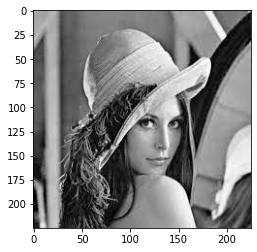

In [3]:
img = mpimg.imread('/content/drive/MyDrive/major_project/gr_img.bmp')
plt.imshow(img)

In [4]:
height = img.shape[0]
width = img.shape[1]
size = height*width

In [5]:
def keygen(x,r,size):
  key = []
  x_temp = y_temp = 0

  for i in range(size):
    x = r*x*(1-x)
    key.append(int((x*pow(10,16))%256))

    #print("\nchaotic values:",'\nx=',x_new,"",'\ny=',y_new)
  return key 

In [6]:
print(keygen(0.01,3.915,size))

[0, 56, 158, 96, 160, 213, 213, 28, 208, 198, 166, 22, 92, 223, 161, 13, 152, 210, 203, 204, 126, 121, 193, 233, 248, 10, 224, 251, 172, 246, 213, 88, 21, 68, 195, 192, 146, 115, 154, 49, 231, 192, 104, 154, 38, 110, 217, 4, 225, 195, 131, 248, 30, 40, 43, 14, 57, 144, 164, 151, 8, 23, 8, 82, 119, 97, 8, 226, 13, 254, 70, 109, 74, 142, 226, 44, 186, 210, 140, 114, 211, 81, 22, 4, 167, 98, 217, 166, 100, 218, 148, 199, 101, 176, 208, 130, 88, 217, 163, 18, 134, 148, 98, 169, 195, 54, 234, 161, 113, 249, 21, 99, 123, 60, 143, 64, 98, 3, 124, 63, 70, 233, 219, 188, 158, 83, 123, 14, 124, 83, 17, 33, 180, 121, 139, 232, 128, 49, 240, 76, 141, 173, 157, 143, 138, 5, 76, 193, 239, 82, 85, 122, 169, 224, 103, 29, 170, 50, 16, 161, 83, 253, 252, 46, 65, 219, 44, 43, 54, 185, 21, 8, 55, 235, 200, 208, 236, 222, 22, 126, 130, 114, 97, 194, 196, 148, 200, 220, 234, 242, 154, 118, 69, 215, 238, 214, 191, 218, 163, 14, 172, 94, 58, 55, 146, 235, 0, 132, 6, 229, 143, 64, 81, 190, 137, 53, 80, 208, 1

In [7]:
key = keygen(0.01,3.915,size)
#print(key)

In [8]:
#encryption

In [16]:
enimg = np.zeros(shape = [height,width,3], dtype = np.uint8)
enimg.shape

(225, 225, 3)

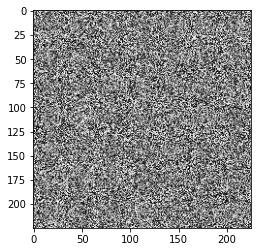

In [17]:
z = 0
for i in range(height):
  for j in range(width):
    #pixel value is XORed with key
    #print(img[i,j])
    t = img[i,j]^key[z]
    enimg[i,j] = t
    z+=1

plt.imshow(enimg)
#plt.show()
#plt.imsave('/content/drive/MyDrive/gr_imgenc.bmp',enimg)

In [11]:
#decryption

In [12]:
z = 0
decimg = np.zeros(shape = [height,width,3],dtype = np.uint8)

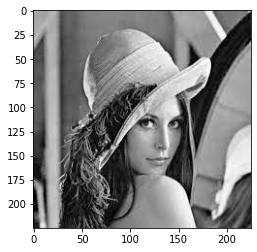

In [13]:
for i in range(height):
  for j in range(width):
    #pixel value XORed with key
    decimg[i,j] = enimg[i,j]^key[z]
    z+=1
  
plt.imshow(decimg)